In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import awkward._v2 as ak   # Awkward Array 2.0, will be officially released in December 2022

# Exercise 4: compute path lengths in each taxi trip

In [2]:
taxi = ak.from_parquet("https://pivarski-princeton.s3.amazonaws.com/chicago-taxi.parquet", row_groups=[0])
taxi.show()

[[{trip: {sec: 60, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 [{trip: {sec: 180, km: 0, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 586, km: 0.966, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 420, km: 1.29, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 0, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 [{trip: {sec: 2.64e+03, km: ..., ...}, payment: {...}, ...}, ..., {...}],
 [{trip: {sec: 2.3e+03, km: 29.1, ...}, payment: {...}, ...}, ..., {...}],
 [],
 [{trip: {sec: 480, km: 2.74, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 0, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 ...,
 [{trip: {sec: 240, km: 0.966, ...}, payment: {...}, company: ..., ...}, ...],
 [{trip: {sec: 0, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 [{trip: {sec: 69, km: 0, ...}, payment: {...}, company: ..., ...}, ..., {...}],
 [{trip: {sec: 0, km: 0, ...}, payment: {...}, c

In [3]:
taxi.type.show()

353 * var * {
    trip: {
        sec: ?float32,
        km: ?float32,
        begin: {
            lon: ?float64,
            lat: ?float64,
            time: ?datetime64[ms]
        },
        end: {
            lon: ?float64,
            lat: ?float64,
            time: ?datetime64[ms]
        },
        path: var * {
            londiff: float32,
            latdiff: float32
        }
    },
    payment: {
        fare: ?float32,
        tips: ?float32,
        total: ?float32,
        type: string
    },
    company: string
}


In [4]:
taxi[1].show()

[{trip: {sec: 180, km: 0, ...}, payment: {fare: ..., ...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 1.02e+03, km: 0, ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 0, km: 0, begin: ..., ...}, payment: {...}, company: ..., ...},
 ...,
 {trip: {sec: 1.68e+03, km: 0, ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 1.26e+03, km: 0, ...}, payment: {...}, company: ..., ...},
 {trip: {sec: 1.98e+03, km: 0, ...}, payment: {...}, company: ..., ...},

In [5]:
taxi[1].trip.show()

[{sec: 180, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 1.02e+03, km: 0, begin: {lon: -87.6, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: None, ...}, end: {...}, path: []},
 {sec: 0, km: 0, begin: {lon: None, ...}, end: {...}, path: []},
 ...,
 {sec: 1.68e+03, km: 0, begin: {lon: -87.9, ...}, end: {...}, path: [...]},
 {sec: 1.26e+03, km: 0, begin: {lon: -87.9, ...}, end: {...}, path: []},
 {sec: 1.98e+03, km: 0, begin: {lon: -87.9, ...}, end: {...}, path: [...]},
 {sec: 0, km: 0, begin: {lon: -87.7, ...}, end: {...}, path: [...]},
 {sec: 1.

In [6]:
taxi[1].trip.path.show()

[[{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: -3.74e-05, latdiff: -1.96e-07}, {londiff: -3.74e-05, ...}],
 [{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: -2.41e-05, latdiff: -3.03e-07}, {londiff: -2.41e-05, ...}],
 [{londiff: 3.43e-07, latdiff: 1.94e-05}, {londiff: 3.43e-07, ...}],
 [{londiff: -6.51e-06, latdiff: 0.000305}, {...}, ..., {londiff: 0.012, ...}],
 [],
 [],
 ...,
 [{londiff: 0.00768, latdiff: -0.001}, {...}, ..., {londiff: 0.219, ...}],
 [],
 [{londiff: 0.00768, latdiff: -0.001}, {...}, ..., {londiff: 0.237, ...}],
 [{londiff: -0.000231, latdiff: -3.99e-06}, {londiff: -0.000231, ...}],
 [{londiff: -8.79e-05, latdiff: 0.000336}, {...}, ..., {londiff: -0.0241, ...}],
 [{londiff: 0.000239, latdiff: 1.81e-06}, {...}, ..., {londiff: 0.000128, ...}],
 [{londiff: 0.0

In [7]:
taxi[1, 7].trip.path.show()

[{londiff: -6.51e-06, latdiff: 0.000305},
 {londiff: 0.000419, latdiff: 0.00031},
 {londiff: 0.00044, latdiff: -0.000322},
 {londiff: 0.0083, latdiff: -0.000161},
 {londiff: 0.0152, latdiff: -7.45e-05},
 {londiff: 0.016, latdiff: 0.0159},
 {londiff: 0.0157, latdiff: 0.0158},
 {londiff: 0.0146, latdiff: 0.0175},
 {londiff: 0.012, latdiff: 0.0174}]


In [8]:
(
    taxi[1].trip.path.londiff,
    taxi[1].trip.path.latdiff,
)

(<Array [[-2.41e-05, -2.41e-05], [...], ..., []] type='499 * var * float32'>,
 <Array [[-3.03e-07, -3.03e-07], [...], ..., []] type='499 * var * float32'>)

(-0.02, 0.02)

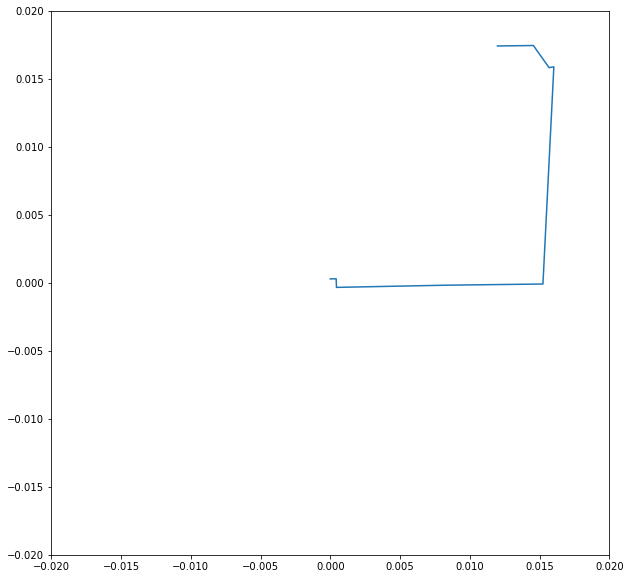

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(taxi[1, 7].trip.path.londiff, taxi[1, 7].trip.path.latdiff)
ax.set_xlim(-0.02, 0.02)
ax.set_ylim(-0.02, 0.02)

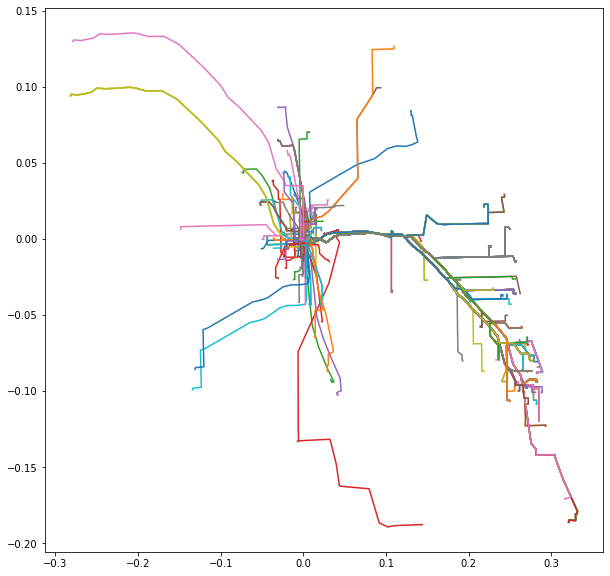

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for ride in taxi[1]:
    ax.plot(ride.trip.path.londiff, ride.trip.path.latdiff)

In [11]:
(
    taxi[1].trip.path.londiff + taxi[1].trip.begin.lon,
    taxi[1].trip.path.latdiff + taxi[1].trip.begin.lat,
)

(<Array [[-87.7, -87.7], [-87.7, ...], ..., []] type='499 * option[var * flo...'>,
 <Array [[41.9, 41.9], [41.9, ...], ..., []] type='499 * option[var * float64]'>)

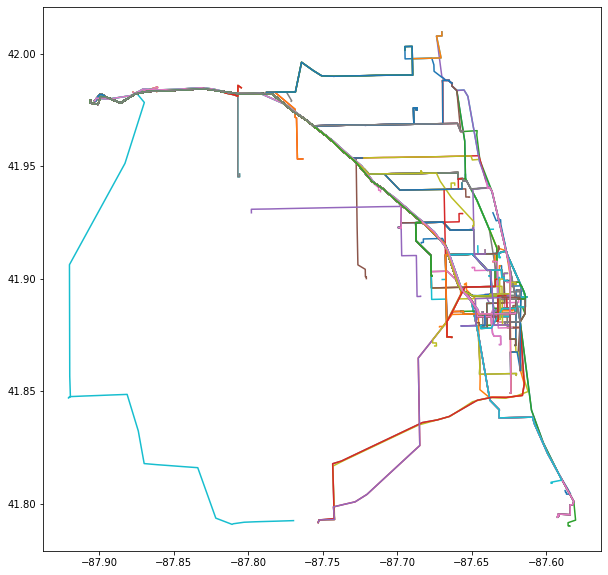

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for ride in taxi[1]:
    if ride.trip.begin.lon is not None and ride.trip.begin.lat is not None:
        longitude = ride.trip.begin.lon + ride.trip.path.londiff
        latitude = ride.trip.begin.lat + ride.trip.path.latdiff
        ax.plot(longitude, latitude)

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3f/USA_Chicago_location_map.svg" width="500">

In [13]:
LONGITUDE, LATITUDE = -87.66178320769112, 41.896777262111726
LON_TO_KM, LAT_TO_KM = 82.98452409203695, 111.07127961503745

In [14]:
(
    (taxi[1, 7].trip.path.londiff + taxi[1, 7].trip.begin.lon - LONGITUDE) * LON_TO_KM,
    (taxi[1, 7].trip.path.latdiff + taxi[1, 7].trip.begin.lat - LATITUDE) * LAT_TO_KM,
)

(<Array [2.41, 2.44, 2.45, 3.1, ..., 3.74, 3.71, 3.62, 3.4] type='9 * float32'>,
 <Array [-1.72, -1.72, -1.79, ..., 0.00678, 0.188, 0.184] type='9 * float32'>)

In [15]:
(
    (taxi[1].trip.path.londiff + taxi[1].trip.begin.lon - LONGITUDE) * LON_TO_KM,
    (taxi[1].trip.path.latdiff + taxi[1].trip.begin.lat - LATITUDE) * LAT_TO_KM,
)

(<Array [[-4.63, -4.63], [-4.63, ...], ..., []] type='499 * option[var * flo...'>,
 <Array [[5.12, 5.12], [5.12, ...], ..., []] type='499 * option[var * float64]'>)

In [16]:
km_east, km_north = (
    (taxi.trip.path.londiff + taxi.trip.begin.lon - LONGITUDE) * LON_TO_KM,
    (taxi.trip.path.latdiff + taxi.trip.begin.lat - LATITUDE) * LAT_TO_KM,
)
km_east, km_north

(<Array [[[-4.63, -4.63], ..., [...]], ...] type='353 * var * option[var * f...'>,
 <Array [[[5.12, 5.12], ..., [10, ...]], ...] type='353 * var * option[var *...'>)

In [17]:
(
    taxi.trip.path.londiff * LON_TO_KM,
    taxi.trip.path.latdiff * LAT_TO_KM,
)

(<Array [[[-0.002, -0.002], ..., [...]], ...] type='353 * var * var * float32'>,
 <Array [[[-3.37e-05, ...], ..., [...]], ...] type='353 * var * var * float32'>)

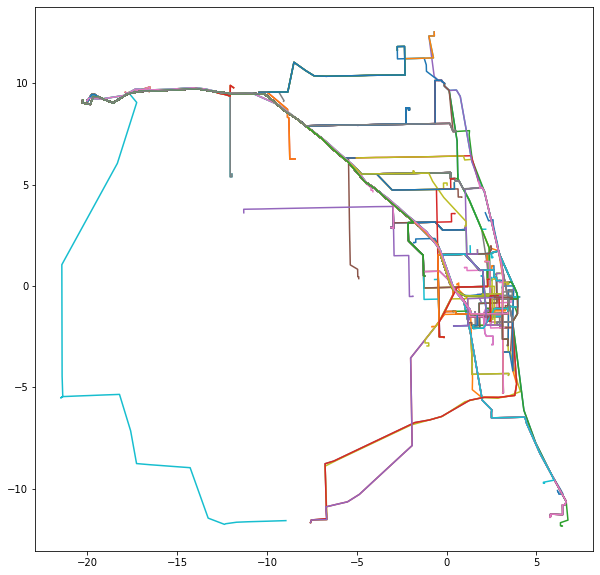

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for x, y in zip(km_east[1], km_north[1]):
    if x is not None and y is not None:
        ax.plot(x, y)

In [19]:
example_east, example_north = (
    km_east[1, 7],
    km_north[1, 7],
)
example_east, example_north

(<Array [2.41, 2.44, 2.45, 3.1, ..., 3.74, 3.71, 3.62, 3.4] type='9 * float64'>,
 <Array [-1.72, -1.72, -1.79, ..., 0.00697, 0.188, 0.184] type='9 * float64'>)

In [20]:
fenceposts = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 10, 20, 30])
fenceposts

array([ 1.1,  2.2,  3.3,  4.4,  5.5, 10. , 20. , 30. ])

In [21]:
(
    fenceposts[1:],
    fenceposts[:-1],
)

(array([ 2.2,  3.3,  4.4,  5.5, 10. , 20. , 30. ]),
 array([ 1.1,  2.2,  3.3,  4.4,  5.5, 10. , 20. ]))

In [22]:
fenceposts[1:] - fenceposts[:-1]

array([ 1.1,  1.1,  1.1,  1.1,  4.5, 10. , 10. ])

In [23]:
example_east[1:] - example_east[:-1]

<Array [0.0354, 0.00174, 0.652, ..., -0.0934, -0.214] type='8 * float64'>

<img src="../img/length-by-segment.svg" width="500">

In [24]:
(
    (example_east[1:] - example_east[:-1])**2,
    (example_north[1:] - example_north[:-1])**2,
)

(<Array [0.00125, 3.04e-06, 0.425, ..., 0.00873, 0.0456] type='8 * float64'>,
 <Array [3.08e-07, 0.00493, 0.00032, ..., 0.0327, 1.43e-05] type='8 * float64'>)

In [25]:
np.sqrt((example_east[1:] - example_east[:-1])**2 + (example_north[1:] - example_north[:-1])**2)

<Array [0.0354, 0.0702, 0.652, ..., 0.0292, 0.204, 0.214] type='8 * float64'>

<img src="../img/example-reduction-sum.svg" width="500">

In [26]:
ak.sum(np.sqrt((example_east[1:] - example_east[:-1])**2 + (example_north[1:] - example_north[:-1])**2), axis=-1)

3.556879836415711

In [27]:
total = 0
for i in range(len(example_east) - 1):
    Δx = example_east[i + 1] - example_east[i]
    Δy = example_north[i + 1] - example_north[i]
    Δr = np.sqrt(Δx**2 + Δy**2)
    total += Δr
total

3.556879836415711

In [38]:
km_east.show()

[[[-4.63, -4.63], [0.475, 0.475, ..., -0.143, -0.143], ..., [-0.127, -0.127]],
 [[-4.63, -4.63], [-4.63, -4.63], ..., [-20.3, -20.3, ..., 0.508, 0.483], []],
 [[2.48, 2.43, 2.43, 3.11, 3.66, 3.65, 3.49], [2.48, ..., 3.68], ..., None],
 [[3.4, 3.13, 3.11, 2.91, 2.91, 2.95], ..., [3.4, 3.41, ..., 0.595, 0.397]],
 [[-4.1, -4.1], [-4.1, ...], ..., [3.03, 3.03, 2.69, 2.66, 2.29, 2.28, 2.36]],
 [[-20, -20, -19.8, -19.7, -19.6, -19.4, ..., 2.68, 2.85, 3.08, 3.4, 3.4], ...],
 [[-20, -20, -19.8, -19.7, -19.6, ..., 0.387, 1.03, 2.05, 2.67, 2.95], ...],
 [],
 [[2.36, 2.28, 2.29, 1.68, 1.07, ..., -0.863, -1.27, -1.28, -1.23, -1.23], ...],
 [[-4.63, -4.63], ..., [2.36, 2.28, 2.27, 2.39, ..., 0.00773, -0.685, -0.69]],
 ...,
 [[2.95, 3.12, 3.11, 3.65, 3.65, 3.49], ..., [2.41, 2.44, ..., 2.51, 2.57]],
 [None, None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, None]

In [39]:
km_east[:, :, 1:].show()

[[[-4.63], [0.475, 0.623, 0.637, ..., -0.405, -0.143, -0.143], ..., [-0.127]],
 [[-4.63], [-4.63], ..., [-20.3, -20.3, -20.3, ..., 0.358, 0.508, 0.483], []],
 [[2.43, 2.43, 3.11, 3.66, 3.65, 3.49], [2.54, 2.57, ..., 3.68], ..., None],
 [[3.13, 3.11, 2.91, 2.91, 2.95], ..., [3.41, 3.18, 2.56, ..., 0.595, 0.397]],
 [[-4.1], [-4.1], ..., [-8.34, ...], [3.03, 2.69, 2.66, 2.29, 2.28, 2.36]],
 [[-20, -19.8, -19.7, -19.6, -19.4, ..., 2.68, 2.85, 3.08, 3.4, 3.4], ...],
 [[-20, -19.8, -19.7, -19.6, -19.4, ..., 0.387, 1.03, 2.05, 2.67, 2.95], ...],
 [],
 [[2.28, 2.29, 1.68, 1.07, 0.355, ..., -1.27, -1.28, -1.23, -1.23], ..., [...]],
 [[-4.63], ..., [2.28, 2.27, 2.39, 2.38, ..., 0.0945, 0.00773, -0.685, -0.69]],
 ...,
 [[3.12, 3.11, 3.65, 3.65, 3.49], ..., [2.44, 2.43, 2.43, ..., 2.51, 2.57]],
 [None, None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, None],
 

In [30]:
distances = ak.sum(np.sqrt((km_east[:, :, 1:] - km_east[:, :, :-1])**2 + (km_north[:, :, 1:] - km_north[:, :, :-1])**2), axis=-1)
distances.show()

[[0, 9.63, 6.2, 2.07, 10.1, 0, 1.21, ..., 1.34, 12.2, 6.27, 2.58, 7.27, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 3.56, None, ..., 0, 24.5, 0, 6.22, 2.26, 7.24, 22.1, 0],
 [1.75, 4.82, 3.71, 2.86, 6.41, 6.89, ..., 2.72, 3.65, 28.3, 0, 24.8, None],
 [1.17, 2.39, 1.07, 4.85, 2.95, 2.78, ..., 0.899, 2.61, 2.22, 1.43, 11.9, 3.65],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 22.9, 23.4, 0, 0, 20.5, 22.9, 23.2, 3.09],
 [29, 2.25, 2.91, 0, 27.9, 16.7, 21.1, ..., 2.49, 0, 14.5, 0, 0, 23.6, 3.44],
 [27.5, 1.59, 1.36, 1.48, 2.46, 1.24, ..., 4.43, 6.22, 26.9, None, 0, 1.24],
 [],
 [4.67, 6.23, 1.35, 4.36, 0, 20.9, 0, ..., 26.9, 23.1, None, 20, 0, 16.6, 21.4],
 [0, 0, 0, 0, 0, 0, 0, 2.88, ..., 14.9, 19.9, 17.8, 9.15, 10.6, 12.2, 16.5, 14],
 ...,
 [1.52, 1.93, 5.76, 5.76, 2.95, 0, ..., 4.18, 1.45, 26.9, 3.55, 4.69, 2.92],
 [None, None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, Non

In [41]:
taxi.trip.km.show()

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.966, 4.83, 3.38, 1.77, 5.31, 10.5, ..., 2.09, 2.25, 30.6, 0, 27.5, 0.161],
 [1.29, 1.77, 1.77, 8.69, 0, 0, 2.57, ..., 1.61, 0, 0, 1.77, 0, 10.6, 3.38],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 1.13, 1.29, 0, 0.322, 1.13, 1.45, 1.45, 0],
 [29.6, 2, 2.46, 50.8, 27, 18.6, ..., 0.612, 14.4, 24.1, 33.4, 24.3, 1.83],
 [29.1, 1.29, 2.11, 1.34, 1.66, 0.595, ..., 5.84, 26.4, 27.7, 0.756, 1.56],
 [],
 [2.74, 5.47, 1.61, 4.35, 0.805, 21.1, 53.6, ..., 20, 0, 26.2, 51, 15.6, 22.5],
 [0, 0, 0, 0, 0, 0, 0, 0, ..., 1.13, 0.966, 0.483, 0.805, 1.13, 0.966, 0.805],
 ...,
 [0.966, 1.45, 6.76, 7.24, 3.22, 1.61, ..., 2.74, 2.09, 28.3, 2.25, 5.15, 2.41],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 2.12, 1.9, 1.43, 23.9, 18.7, ..., 21.5, 1.21, 38.2, 1.71, 8.77, 10.1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 

In [42]:
(distances - taxi.trip.km).show()

[[0, 9.63, 6.2, 2.07, 10.1, 0, 1.21, ..., 1.34, 12.2, 6.27, 2.58, 7.27, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 3.56, None, ..., 0, 24.5, 0, 6.22, 2.26, 7.24, 22.1, 0],
 [0.789, -0.0061, 0.332, 1.09, 1.1, -3.57, ..., 1.4, -2.3, 0, -2.69, None],
 [-0.117, 0.616, -0.699, -3.84, 2.95, 2.78, ..., 2.61, 0.448, 1.43, 1.3, 0.272],
 [0, 0, 0, 0, 0, 0, 0, 0, ..., 21.8, 22.1, 0, -0.322, 19.4, 21.5, 21.8, 3.09],
 [-0.562, 0.253, 0.445, -50.8, 0.911, ..., 0.0948, -24.1, -33.4, -0.636, 1.61],
 [-1.53, 0.298, -0.75, 0.14, 0.798, ..., 0.376, 0.493, None, -0.756, -0.326],
 [],
 [1.93, 0.76, -0.259, 0.0169, -0.805, ..., None, -6.18, -51, 0.997, -1.16],
 [0, 0, 0, 0, 0, 0, 0, 2.88, ..., 14.1, 18.8, 16.8, 8.66, 9.81, 11, 15.5, 13.2],
 ...,
 [0.559, 0.479, -0.999, -1.48, -0.265, ..., -0.638, -1.42, 1.3, -0.465, 0.508],
 [None, None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, N

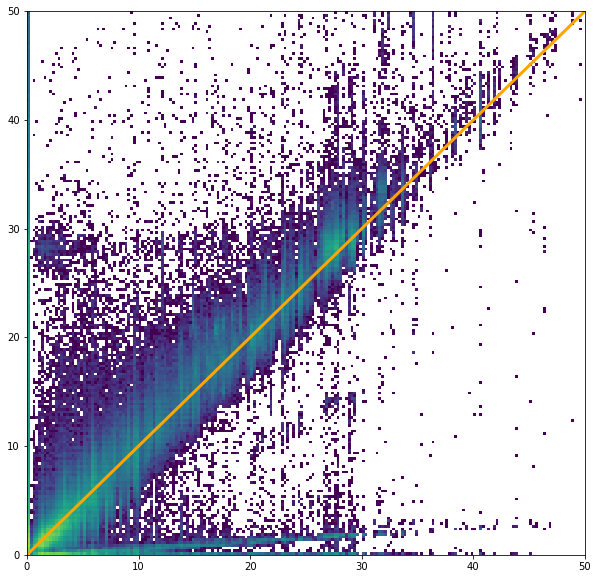

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.hist2d(
    ak.flatten(ak.fill_none(distances, 0)),
    ak.flatten(ak.fill_none(taxi.trip.km, 0)),
    bins=(200, 200),
    range=((0, 50), (0, 50)),
    norm=matplotlib.colors.LogNorm(),
)
ax.plot([0, 50], [0, 50], c="orange", lw=3)

<img src="../img/as-the-crow-flies.svg" width="500">

In [59]:
example_east

<Array [2.41, 2.44, 2.45, 3.1, ..., 3.74, 3.71, 3.62, 3.4] type='9 * float64'>

In [62]:
example_east[-1], example_east[0]

(3.4038764557091996, 2.4090579695560597)

In [60]:
np.sqrt((example_east[-1] - example_east[0])**2 + (example_north[-1] - example_north[0])**2)

2.147622255377591

In [70]:
contains_empty_lists = ak.Array([[1.1, 2.2, 3.3], [], [4.4, 5.5]])

try:
    contains_empty_lists[:, 0]
except Exception as err:
    print(err)

while attempting to slice (from /tmp/ipykernel_89837/540697747.py, line 4)

    <Array [[1.1, 2.2, 3.3], [], [4.4, 5.5]] type='3 * var * float64'>

with

    (:, 0)

at inner ListArray of length 3, using sub-slice 0.

Error details: index out of range while attempting to get index 0 (in compiled code: https://github.com/scikit-hep/awkward-1.0/blob/1.9.0rc4/src/cpu-kernels/awkward_NumpyArray_getitem_next_at.cpp#L21).


In [71]:
ak.pad_none(contains_empty_lists, 2).show()

[[1.1, 2.2, 3.3],
 [None, None],
 [4.4, 5.5]]


In [72]:
ak.fill_none(ak.pad_none(contains_empty_lists, 2), 0).show()

[[1.1, 2.2, 3.3],
 [0, 0],
 [4.4, 5.5]]


In [73]:
doesnt_contain_empty_lists = ak.fill_none(ak.pad_none(contains_empty_lists, 2), 0)

doesnt_contain_empty_lists[:, 0]

<Array [1.1, 0, 4.4] type='3 * float64'>

In [76]:
pad_km_east = ak.fill_none(ak.pad_none(km_east, 2, axis=-1), 0, axis=-1)
pad_km_north = ak.fill_none(ak.pad_none(km_north, 2, axis=-1), 0, axis=-1)

In [77]:
crow_flies = np.sqrt((pad_km_east[:, :, -1] - pad_km_east[:, :, 0])**2 + (pad_km_north[:, :, -1] - pad_km_north[:, :, 0])**2)
crow_flies.show()

[[0, 7.82, 4.91, 1.64, 7.9, 0, 0.688, ..., 0.941, 10.4, 5.07, 2.09, 5.53, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 2.15, None, ..., 0, 20.9, 0, 5.22, 1.62, 6.67, 20.8, 0],
 [1.06, 3.82, 2.6, 2.06, 5.12, 6.54, 1.19, ..., 2.41, 3, 25.6, 0, 22.6, None],
 [0.799, 1.59, 0.858, 3.29, 2.46, 2.02, ..., 1.87, 1.58, 1.12, 9.84, 3.08],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 21.1, 20.2, 0, 0, 18.7, 21.1, 19.3, 2.38],
 [25.6, 1.56, 2.49, 0, 19.8, 15.4, 18.3, ..., 2.36, 0, 12.4, 0, 0, 21.9, 3.04],
 [24.9, 0.923, 0.908, 1.07, 1.92, 0.953, ..., 3.22, 5.22, 24.3, None, 0, 0.953],
 [],
 [3.59, 4.4, 0.88, 3.42, 0, 14, 0, ..., 24.3, 16.4, None, 17, 0, 14.3, 17.6],
 [0, 0, 0, 0, 0, 0, 0, 2.4, ..., 17.8, 15.8, 7.14, 9.54, 11.5, 12.1, 12.6],
 ...,
 [0.711, 1.36, 5.28, 5.28, 2.46, 0, ..., 3.21, 0.961, 24.5, 3.05, 4.53, 2.72],
 [None, None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, None],
 [None, None, None, None, None, None, ..., None, None, None, None, None, None

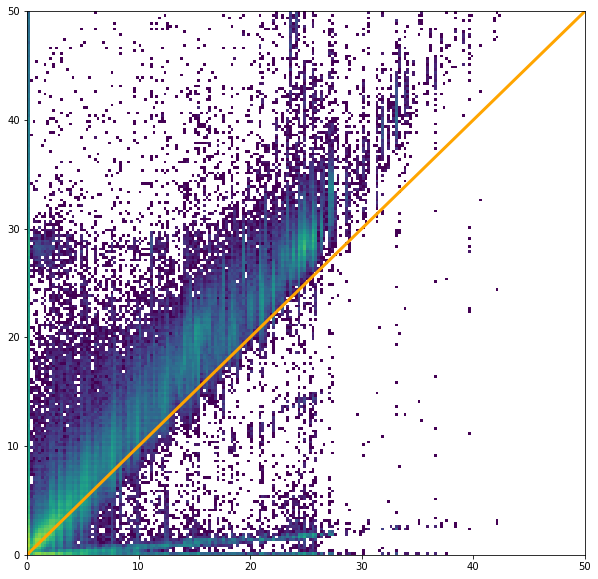

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.hist2d(
    ak.flatten(ak.fill_none(crow_flies, 0)),
    ak.flatten(ak.fill_none(taxi.trip.km, 0)),
    bins=(200, 200),
    range=((0, 50), (0, 50)),
    norm=matplotlib.colors.LogNorm(),
)
ax.plot([0, 50], [0, 50], c="orange", lw=3)